<a href="https://colab.research.google.com/github/konrad-l/roughness_prediction/blob/main/Models_calculation_Ra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df_raw = pd.read_excel('Ra_CNC.xlsx')
df = df_raw.copy()

In [ ]:
df.head()

,α [°],θ [°],Vu [mm/s],δ [-],Fx [kN],Fr [kN],M [Nm],Wz [μm],Ra [μm],Rz [μm]
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5,16.58,86.28
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3,4.33,37.63
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1,3.72,32.56
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7,15.63,86.73
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6,4.48,34.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   α [°]      81 non-null     int64  
 1   θ [°]      81 non-null     float64
 2   Vu [mm/s]  81 non-null     int64  
 3   δ [-]      81 non-null     float64
 4   Fx [kN]    70 non-null     float64
 5   Fr [kN]    70 non-null     float64
 6   M [Nm]     70 non-null     float64
 7   Wz [μm]    70 non-null     float64
 8   Ra [μm]    70 non-null     float64
 9   Rz [μm]    70 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 6.5 KB


In [ ]:
df.columns = ['alfa', 'tetha', 'Vu', 'gniot', 'Fx', 'Fr', 'M', 'Wz', 'Ra', 'Rz']
df.head()

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz,Ra,Rz
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5,16.58,86.28
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3,4.33,37.63
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1,3.72,32.56
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7,15.63,86.73
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6,4.48,34.46


In [ ]:
df.loc[:, ['Ra', 'Rz']].isnull().sum()

Ra    11
Rz    11
dtype: int64

In [ ]:
df[(df['Ra'].isnull()) & (df['Rz'].isnull())]

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz,Ra,Rz
6,15,2.5,40,1.13,NaN,NaN,NaN,NaN,NaN,NaN
7,15,2.5,40,1.30,NaN,NaN,NaN,NaN,NaN,NaN
8,15,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
17,20,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
24,25,2.5,40,1.13,NaN,NaN,NaN,NaN,NaN,NaN
25,25,2.5,40,1.30,NaN,NaN,NaN,NaN,NaN,NaN
26,25,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
54,15,7.5,10,1.13,NaN,NaN,NaN,NaN,NaN,NaN
56,15,7.5,10,1.53,NaN,NaN,NaN,NaN,NaN,NaN
63,20,7.5,10,1.13,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna().reset_index(drop=True)
df = df.round(2)
df

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz,Ra,Rz
0,15,2.5,10,1.13,3.81,34.81,360.84,123.5,16.58,86.28
1,15,2.5,10,1.30,4.50,46.91,487.34,48.3,4.33,37.63
2,15,2.5,10,1.53,9.20,49.44,519.86,45.1,3.72,32.56
3,15,2.5,20,1.13,2.95,28.16,396.28,118.7,15.63,86.73
4,15,2.5,20,1.30,9.93,42.39,600.23,52.6,4.48,34.46
...,...,...,...,...,...,...,...,...,...,...
65,25,7.5,20,1.30,0.84,32.88,701.94,125.1,9.40,72.50
66,25,7.5,20,1.53,12.34,38.16,786.54,199.6,8.20,41.73
67,25,7.5,40,1.13,3.84,26.14,589.82,280.1,24.10,141.70
68,25,7.5,40,1.30,9.26,38.16,932.41,113.3,6.90,54.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   alfa    70 non-null     int64  
 1   tetha   70 non-null     float64
 2   Vu      70 non-null     int64  
 3   gniot   70 non-null     float64
 4   Fx      70 non-null     float64
 5   Fr      70 non-null     float64
 6   M       70 non-null     float64
 7   Wz      70 non-null     float64
 8   Ra      70 non-null     float64
 9   Rz      70 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 5.6 KB


In [ ]:
df.corr()

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz,Ra,Rz
alfa,1.000000,0.043133,-0.036881,0.002977,0.334302,-0.382654,-0.061227,0.206879,0.077904,0.048843
tetha,0.043133,1.000000,0.265283,0.020517,-0.450355,-0.073572,0.494799,0.588393,0.297370,0.351749
Vu,-0.036881,0.265283,1.000000,-0.023870,0.268592,0.031388,0.548960,0.143914,-0.072291,-0.018580
gniot,0.002977,0.020517,-0.023870,1.000000,0.549815,0.793421,0.590897,-0.459641,-0.709609,-0.762138
Fx,0.334302,-0.450355,0.268592,0.549815,1.000000,0.343027,0.305656,-0.475014,-0.650835,-0.684625
Fr,-0.382654,-0.073572,0.031388,0.793421,0.343027,1.000000,0.616874,-0.584735,-0.709674,-0.737760
M,-0.061227,0.494799,0.548960,0.590897,0.305656,0.616874,1.000000,-0.100229,-0.457385,-0.432575
Wz,0.206879,0.588393,0.143914,-0.459641,-0.475014,-0.584735,-0.100229,1.000000,0.852634,0.848113
Ra,0.077904,0.297370,-0.072291,-0.709609,-0.650835,-0.709674,-0.457385,0.852634,1.000000,0.975417
Rz,0.048843,0.351749,-0.018580,-0.762138,-0.684625,-0.737760,-0.432575,0.848113,0.975417,1.000000


Text(0.5, 1.0, 'Heatmap')

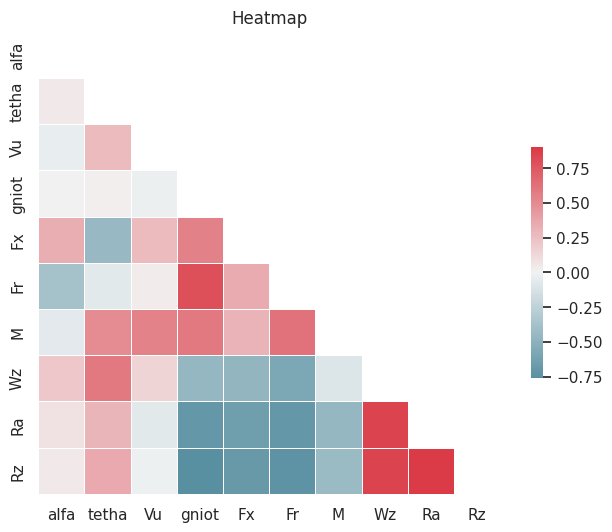

In [ ]:
corr = df.corr()

sns.set(style='white')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.9, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
ax.set_title('Heatmap')

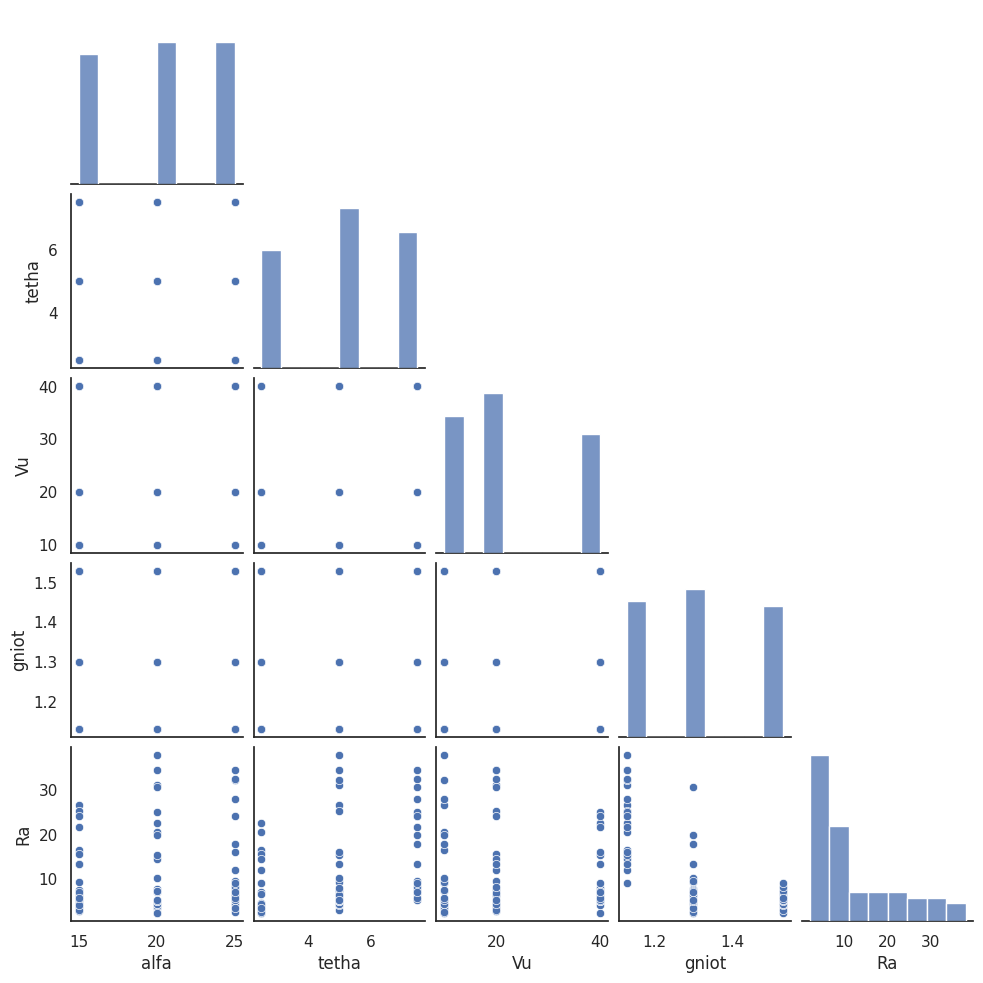

In [ ]:
sns.pairplot(df[['alfa', 'tetha', 'Vu', 'gniot', 'Ra']], height=2, corner=True)

**Przygotowanie danych**

In [ ]:
data_raw = df.values
# Ra - target
target = data_raw[:,8]
print('target shape:', target.shape)

data = data_raw[:,:4]
print('data shape:', data.shape)

target shape: (70,)
data shape: (70, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (52, 4)
X_test shape (18, 4)
y_train shape (52,)
y_test shape (18,)


**Regresja liniowa**

In [ ]:
from sklearn.metrics import r2_score
# MAE - błąd średni bezwzględny
from sklearn.metrics import mean_absolute_error
# MSE - błąd średniokwadratowy
from sklearn.metrics import mean_squared_error
# Max Error - błąd maksymalny
from sklearn.metrics import max_error

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'Max Error: {max_error(y_test, y_pred):.2f}')
print(f'R2_score: {r2_score(y_test, y_pred):.2f}')

MAE: 3.35
MSE: 17.31
RMSE: 4.16
Max Error: 9.77
R2_score: 0.68


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=7)
scores

array([-30.56626984,   0.51756324,   0.75452641,   0.59125009,
         0.585092  ,   0.58746959,   0.55570342])

In [ ]:
predictions = pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred})
predictions.head()

,y_test,y_pred
0,5.15,4.327997
1,16.58,17.218076
2,13.40,17.227531
3,4.48,7.985778
4,19.83,19.929527


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predictions.index, y=predictions['y_test'], mode='lines', name='Test values'))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions['y_pred'], mode='lines', name='Prediction values'))
fig.update_layout(height=500, width=900, title_text="Roughness - Linear Regression",
                  xaxis_title='Sample number', yaxis_title='Rz')

**Biblioteka SHAP (Wartość Shapley’a)**

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.explainers.Linear(regressor, X_train)

In [ ]:
shap_values = explainer.shap_values(X_test)
print(f'Shape: {shap_values.shape}')
pd.DataFrame(shap_values).head()

Shape: (18, 4)


,0,1,2,3
0,-0.964461,-0.444315,2.237678,-8.822827
1,-0.964461,-5.065191,2.237678,8.688128
2,-0.964461,4.176561,0.447536,1.245972
3,-0.964461,-5.065191,0.447536,1.245972
4,-0.052607,4.176561,2.237678,1.245972


In [ ]:
column_names = ['α', 'θ', 'Vu', 'δ']

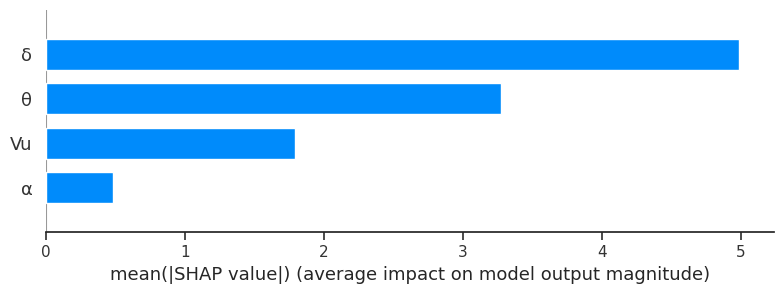

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=column_names)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


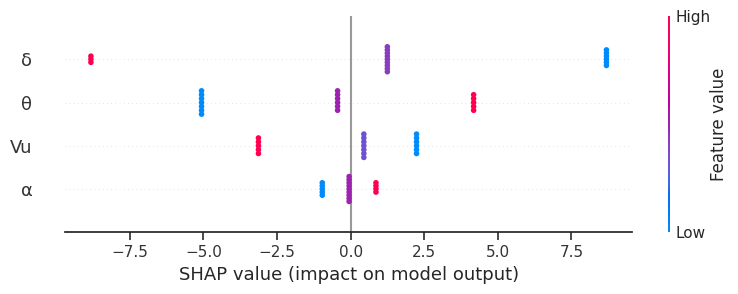

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=column_names)

**Interpretacja graficzna**

In [ ]:
def plot_regression_results(y_true, y_pred):
  results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
  min = results[['y_true', 'y_pred']].min().min()
  max = results[['y_true', 'y_pred']].max().max()

  fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                  go.Scatter(x=[min, max], y=[min, max])],
                  layout=go.Layout(showlegend=False, width=800,
                                   xaxis_title='y_test',
                                   yaxis_title='y_pred',
                                   title='Regresja: y_test vs. y_pred'))

  fig.show()

plot_regression_results(y_test, y_pred)

**Lasy losowe**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'Max Error: {max_error(y_test, y_pred):.2f}')
print(f'R2_score: {r2_score(y_test, y_pred):.2f}')

MAE: 2.33
MSE: 9.09
RMSE: 3.01
Max Error: 7.04
R2_score: 0.83


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=7)
scores

array([-30.56626984,   0.51756324,   0.75452641,   0.59125009,
         0.585092  ,   0.58746959,   0.55570342])

In [ ]:
# Grid Search

from sklearn.model_selection import GridSearchCV

regressorGS = RandomForestRegressor()

params = {'n_estimators': np.arange(10, 101, 5),
          'max_depth': np.arange(1, 50, 5),
          'min_samples_leaf': [2]}

grid_search = GridSearchCV(regressorGS, param_grid=params, scoring='r2', cv=7)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                         'min_samples_leaf': [2],
                         'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100])},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'max_depth': 41, 'min_samples_leaf': 2, 'n_estimators': 15}

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=41, min_samples_leaf=2, n_estimators=15)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.8156948361305636

In [ ]:
# Grid Search
# zmiana hiperparametrów
from sklearn.model_selection import GridSearchCV

regressorGS = RandomForestRegressor()

params = {'n_estimators': np.arange(10, 101, 1),
          'min_samples_leaf': [2]}

grid_search = GridSearchCV(regressorGS, param_grid=params, scoring='r2', cv=7)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [2],
                         'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'min_samples_leaf': 2, 'n_estimators': 21}

In [ ]:
# stare z Rz
rf_regressor = RandomForestRegressor(min_samples_leaf=2, n_estimators=14)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.748732385648073

In [ ]:
rf_regressor = RandomForestRegressor(min_samples_leaf=2, n_estimators=21)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.8082537802196201

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'Max Error: {max_error(y_test, y_pred):.2f}')
print(f'R2_score: {r2_score(y_test, y_pred):.2f}')

MAE: 2.40
MSE: 10.41
RMSE: 3.23
Max Error: 8.56
R2_score: 0.81


In [ ]:
explainer = shap.explainers.Tree(rf_regressor)

shap_values = explainer.shap_values(X_test)
print(f'Shape: {shap_values.shape}')
pd.DataFrame(shap_values).head()

Shape: (18, 4)


,0,1,2,3
0,-0.827545,-0.116153,0.759007,-7.190910
1,-0.881987,-5.925232,0.820362,10.515406
2,-0.553260,4.256553,1.736717,-3.173934
3,-0.370106,-4.611623,0.491641,-4.546058
4,0.684695,4.381636,1.955645,-4.012467


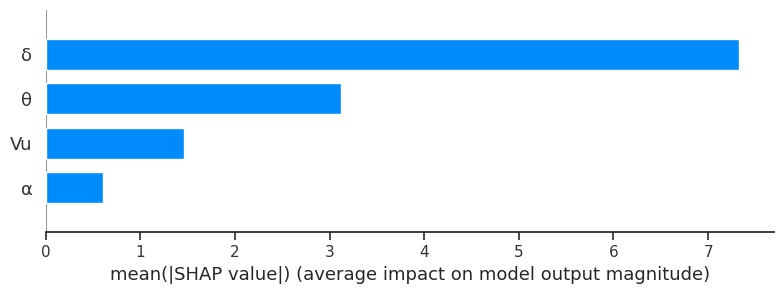

In [ ]:
column_names = ['α', 'θ', 'Vu', 'δ']

shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=column_names)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


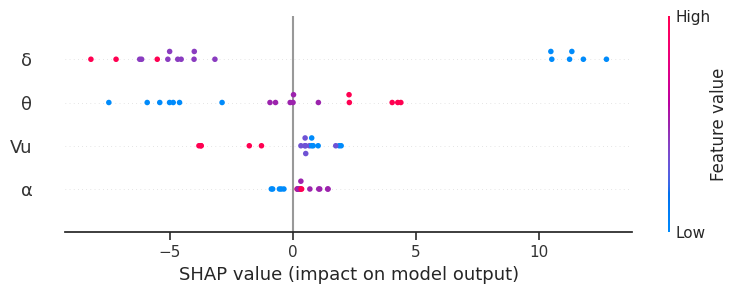

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=column_names)

In [ ]:
def plot_regression_results(y_true, y_pred):
  results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
  min = results[['y_true', 'y_pred']].min().min()
  max = results[['y_true', 'y_pred']].max().max()

  fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                  go.Scatter(x=[min, max], y=[min, max])],
                  layout=go.Layout(showlegend=False, width=800,
                                   xaxis_title='y_test',
                                   yaxis_title='y_pred',
                                   title='Regresja Random Forest: y_test vs. y_pred'))

  fig.show()

plot_regression_results(y_test, y_pred)

**Support Vector Regression "SVR"**

In [ ]:
from sklearn.svm import SVR

svr = SVR(C=8.0, epsilon=0.2, kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'Max Error: {max_error(y_test, y_pred):.2f}')
print(f'R2_score: {r2_score(y_test, y_pred):.2f}')

MAE: 3.25
MSE: 16.64
RMSE: 4.08
Max Error: 10.38
R2_score: 0.69


In [ ]:
# Grid Search

from sklearn.model_selection import GridSearchCV

regressor = SVR()

params = {'kernel': ['linear', 'sigmoid'] ,
          'C': np.arange(1, 100, 1),
          'epsilon': np.arange(0.1, 20, 0.1),
          }

grid_search = GridSearchCV(regressor, param_grid=params, scoring='r2', cv=7)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=7, estimator=SVR(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'ep...
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4,
       15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6,
       17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7,
       18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8,
       19.9]),
                         'kernel': ['linear', 'sigmoid']},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'C': 1, 'epsilon': 0.5, 'kernel': 'sigmoid'}

In [ ]:
# stare
svr = SVR(C=17.0, epsilon=10.5, kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

r2_score(y_test, y_pred)

0.5814043532132922

In [ ]:
svr = SVR(C=1, epsilon=0.5, kernel='sigmoid')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

r2_score(y_test, y_pred)

0.46187342910044993

In [ ]:
explainer = shap.KernelExplainer(svr.predict, X_train)

shap_values = explainer.shap_values(X_test)
print(f'Shape: {shap_values.shape}')
pd.DataFrame(shap_values).head()

  0%|          | 0/18 [00:00<?, ?it/s]

Shape: (18, 4)


,0,1,2,3
0,-0.680700,-0.180217,0.077535,-4.159526
1,-0.602448,-1.826042,0.301436,4.022668
2,-0.695422,1.485198,0.022176,0.572473
3,-0.698543,-1.817021,-0.039837,0.478055
4,-0.026631,1.487511,0.153928,0.590974


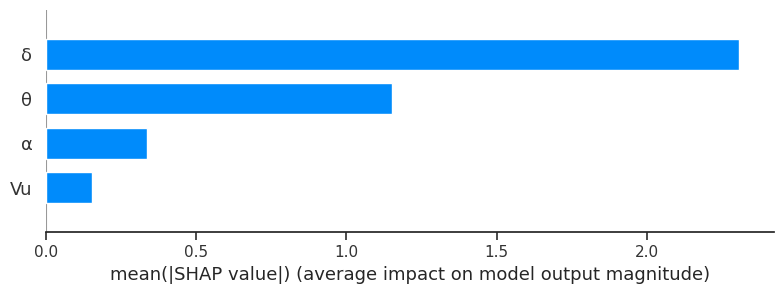

In [ ]:
column_names = ['α', 'θ', 'Vu', 'δ']

shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=column_names)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


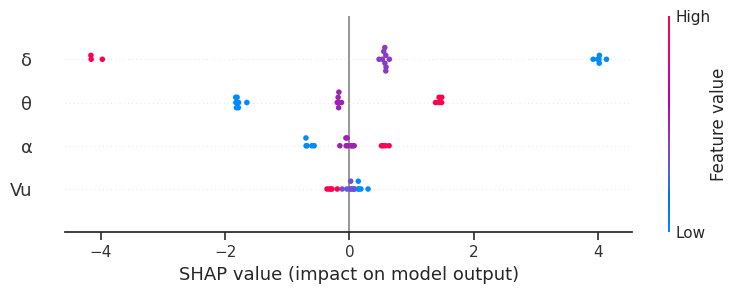

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=column_names)

In [ ]:
def plot_regression_results(y_true, y_pred):
  results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
  min = results[['y_true', 'y_pred']].min().min()
  max = results[['y_true', 'y_pred']].max().max()

  fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                  go.Scatter(x=[min, max], y=[min, max])],
                  layout=go.Layout(showlegend=False, width=800,
                                   xaxis_title='y_test',
                                   yaxis_title='y_pred',
                                   title='Regresja SVR: y_test vs. y_pred'))

  fig.show()

plot_regression_results(y_test, y_pred)

**XGBoost**

In [ ]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(objective="reg:squarederror")
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'Max Error: {max_error(y_test, y_pred):.2f}')
print(f'R2_score: {r2_score(y_test, y_pred):.2f}')

MAE: 3.27
MSE: 23.19
RMSE: 4.82
Max Error: 10.96
R2_score: 0.57


In [ ]:
# Grid Search

from sklearn.model_selection import GridSearchCV

regressorGS = XGBRegressor(objective="reg:squarederror")

params = {'learning_rate': np.arange(0.01, 0.9, 0.01),
          'n_estimators': np.arange(100, 500, 5)}

grid_search = GridSearchCV(regressorGS, param_grid=params, scoring='r2', cv=7)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=7,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                         'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355,
       360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420,
       425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485,
       490, 495])},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 115}

In [ ]:
# stare
xgb_regressor = XGBRegressor(objective="reg:squarederror", learning_rate=0.63, n_estimators=100)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.6005925958192896

In [ ]:
xgb_regressor = XGBRegressor(objective="reg:squarederror", learning_rate=0.61, n_estimators=115)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.6487795540558055

In [ ]:
explainer = shap.TreeExplainer(xgb_regressor)

shap_values = explainer.shap_values(X_test)
print(f'Shape: {shap_values.shape}')
pd.DataFrame(shap_values).head(3)

Shape: (18, 4)


,0,1,2,3
0,-1.200906,-0.028658,0.605998,-7.924770
1,-0.248849,-6.843792,0.872818,9.771200
2,-3.833014,2.451798,0.786066,-4.435373


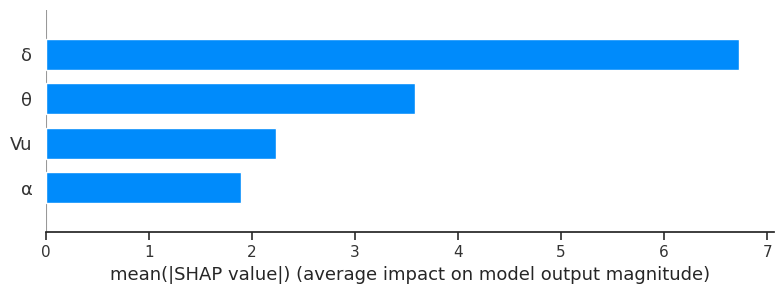

In [ ]:
column_names = ['α', 'θ', 'Vu', 'δ']

shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=column_names)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


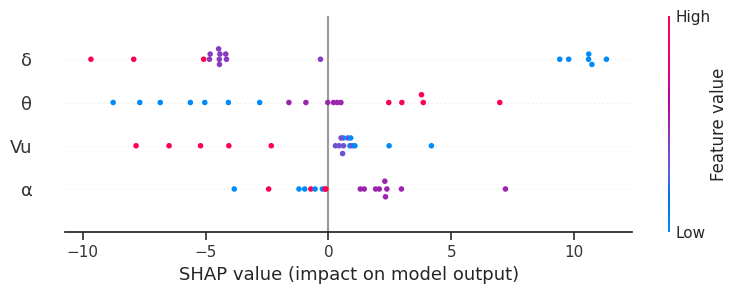

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=column_names)

In [ ]:
def plot_regression_results(y_true, y_pred):
  results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
  min = results[['y_true', 'y_pred']].min().min()
  max = results[['y_true', 'y_pred']].max().max()

  fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                  go.Scatter(x=[min, max], y=[min, max])],
                  layout=go.Layout(showlegend=False, width=800,
                                   xaxis_title='y_test',
                                   yaxis_title='y_pred',
                                   title='Regresja XGBoost: y_test vs. y_pred'))

  fig.show()

plot_regression_results(y_test, y_pred)

**Regresja wielomianowa**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

data_poly = poly.fit_transform(data)
data_poly

array([[ 1.        , -1.26962211, -1.33256948, ...,  1.09362809,
         1.2125626 ,  1.34443151],
       [ 1.        , -1.26962211, -1.33256948, ...,  1.09362809,
         0.10685418,  0.01044031],
       [ 1.        , -1.26962211, -1.33256948, ...,  1.09362809,
        -1.38910428,  1.76441217],
       ...,
       [ 1.        ,  1.19908755,  1.22304322, ...,  2.18595579,
        -1.71431264,  1.34443151],
       [ 1.        ,  1.19908755,  1.22304322, ...,  2.18595579,
        -0.1510697 ,  0.01044031],
       [ 1.        ,  1.19908755,  1.22304322, ...,  2.18595579,
         1.96390605,  1.76441217]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_poly, target, test_size=0.3, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (49, 15)
X_test shape (21, 15)
y_train shape (49,)
y_test shape (21,)


In [ ]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_train, y_train)

y_pred_2 = regressor_poly.predict(X_test)

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_2):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_2):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_2)):.2f}')
print(f'Max Error: {max_error(y_test, y_pred_2):.2f}')
print(f'R2_score: {r2_score(y_test, y_pred_2):.2f}')

MAE: 3.36
MSE: 18.98
RMSE: 4.36
Max Error: 12.64
R2_score: 0.64


In [ ]:
def plot_regression_results(y_true, y_pred):
  results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
  min = results[['y_true', 'y_pred']].min().min()
  max = results[['y_true', 'y_pred']].max().max()

  fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                  go.Scatter(x=[min, max], y=[min, max])],
                  layout=go.Layout(showlegend=False, width=800,
                                   xaxis_title='y_test',
                                   yaxis_title='y_pred',
                                   title='Regresja: y_test vs. y_pred'))

  fig.show()

plot_regression_results(y_test, y_pred_2)

**Odkuwka osi kolejowej - testowanie**

In [ ]:
rail = {'alfa': [20, 20, 20, 20, 20],
        'tetha': [5, 5, 5, 5, 5],
        'Vu': [15, 15, 30.5, 15, 15],
        'gniot': [1.48, 1.05, 1.21, 1.05, 1.48],
        'Ra': [5.3, 25.9, 20.1, 26.9, 4.1]}

#oryginalne: 'Vu': [15, 15, 20, 15, 15],

In [ ]:
df_rail = pd.DataFrame(rail)
df_rail

,alfa,tetha,Vu,gniot,Ra
0,20,5,15.0,1.48,5.3
1,20,5,15.0,1.05,25.9
2,20,5,30.5,1.21,20.1
3,20,5,15.0,1.05,26.9
4,20,5,15.0,1.48,4.1


In [ ]:
rail_raw = df_rail.values
# Ra - target
data_rail = rail_raw[:,:4]
print('data shape:', data_rail.shape)

target_rail = rail_raw[:,4]
print('target shape:', target_rail.shape)

data shape: (5, 4)
target shape: (5,)


In [ ]:
data_rail = scaler.transform(data_rail)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(min_samples_leaf=2, n_estimators=21)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.8210281921389586

In [ ]:
"""
rf_regressor = RandomForestRegressor(max_depth=40, min_samples_leaf=2, n_estimators=10)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

r2_score(y_test, y_pred)
"""

0.7243583128648721

In [ ]:
y_pred = rf_regressor.predict(data_rail)

r2_score(target_rail, y_pred)

0.867356732735172

In [ ]:
df_summary = pd.DataFrame({'Rzeczywiste': target_rail, 'Predykcja': y_pred.round(2)})
df_summary

,Rzeczywiste,Predykcja
0,5.3,4.64
1,25.9,32.04
2,20.1,20.12
3,26.9,32.04
4,4.1,4.64


In [ ]:
print(f'MAE: {mean_absolute_error(target_rail, y_pred):.2f}')
print(f'MSE: {mean_squared_error(target_rail, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(target_rail, y_pred)):.2f}')
print(f'Max Error: {max_error(target_rail, y_pred):.2f}')
print(f'R2_score: {r2_score(target_rail, y_pred):.2f}')

MAE: 2.50
MSE: 12.96
RMSE: 3.60
Max Error: 6.14
R2_score: 0.87
